In [514]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [515]:
import matplotlib
matplotlib.__version__


'3.10.5'

In [516]:
print(pd.__version__, np.__version__)

2.3.2 2.3.2


## 1. Load the data

In [517]:
df = pd.read_csv("brain_stroke.csv")


In [518]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', nan, 'children'],
      dtype=object)

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4976 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4980 non-null   float64
 3   heart_disease      4979 non-null   float64
 4   ever_married       4975 non-null   object 
 5   work_type          4971 non-null   object 
 6   Residence_type     4973 non-null   object 
 7   avg_glucose_level  4975 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4976 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 428.2+ KB


In [489]:
df.isnull().sum() # checking missing values

gender                5
age                   0
hypertension          1
heart_disease         2
ever_married          6
work_type            10
Residence_type        8
avg_glucose_level     6
bmi                   0
smoking_status        5
stroke                0
dtype: int64

In [490]:
# Spliting the Datasets in to  the X and y
X = df.drop(columns=['stroke'])
y = df["stroke"]

In [491]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,NaN,81.0,0.0,0.0,Yes,Private,Urban,NaN,29.0,formerly smoked


In [492]:
# spliting data into training and test data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [493]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
772,Male,71.0,0.0,0.0,Yes,Govt_job,Rural,186.45,26.7,never smoked
2160,Female,21.0,0.0,0.0,No,Private,Rural,59.52,33.7,never smoked
54,Male,76.0,0.0,0.0,Yes,Private,Urban,104.47,20.3,Unknown
3279,Male,51.0,0.0,0.0,Yes,Self-employed,Urban,75.73,30.7,never smoked
692,Female,56.0,0.0,0.0,Yes,Private,Rural,114.21,21.3,never smoked


In [494]:
y_train.value_counts()

stroke
0    3788
1     196
Name: count, dtype: int64

In [495]:
# 1. Set the conditions
cond0 = y_train == 0   # majority class
cond1 = y_train == 1   # minority class

# 2. Sample majority class, keep all minority
y_train_0 = y_train[cond0].sample(n=196, random_state=999)
y_train_1 = y_train[cond1]  # 192 samples

# 3. Concatenate them
y_train = pd.concat([y_train_0, y_train_1])

# 4. Check distribution
print(y_train.value_counts())


stroke
0    196
1    196
Name: count, dtype: int64


In [496]:
X_train = X_train.loc[y_train.index]

In [497]:
X_train.info()



<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 4513 to 122
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             388 non-null    object 
 1   age                392 non-null    float64
 2   hypertension       392 non-null    float64
 3   heart_disease      392 non-null    float64
 4   ever_married       392 non-null    object 
 5   work_type          388 non-null    object 
 6   Residence_type     388 non-null    object 
 7   avg_glucose_level  391 non-null    float64
 8   bmi                392 non-null    float64
 9   smoking_status     389 non-null    object 
dtypes: float64(5), object(5)
memory usage: 33.7+ KB


In [498]:
#missing values in X_train 
X_train.isnull().sum()

gender               4
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            4
Residence_type       4
avg_glucose_level    1
bmi                  0
smoking_status       3
dtype: int64

In [499]:
# missing values in X_test

X_test.isnull().sum()

gender               1
age                  0
hypertension         0
heart_disease        2
ever_married         2
work_type            3
Residence_type       3
avg_glucose_level    2
bmi                  0
smoking_status       0
dtype: int64

In [501]:
X_train.gender.unique() # checking the categori in gender

array(['Male', 'Female', nan], dtype=object)

In [502]:
# Checking the percetange data in each category
X_train['gender'].value_counts(dropna=False, normalize=True)

gender
Female    0.568878
Male      0.420918
NaN       0.010204
Name: proportion, dtype: float64

In [477]:
## Since the percentage of Nan is below 1 percentage, I am going to fill with mood. 
X_train['gender'] = X_train['gender'].fillna(X_train['gender'].mode()[0])
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4513,Male,66.0,0.0,0.0,Yes,Private,Rural,67.92,31.1,formerly smoked
3844,Female,78.0,0.0,0.0,Yes,Self-employed,Rural,208.99,31.4,formerly smoked
4732,Female,61.0,0.0,0.0,Yes,Govt_job,Rural,120.23,22.7,Unknown
3423,Male,78.0,0.0,1.0,Yes,Self-employed,Urban,101.53,24.1,formerly smoked
1403,Male,56.0,0.0,0.0,Yes,Private,Rural,97.50,36.3,formerly smoked


In [503]:
## Checking gender oin X_train 
X_train.gender.value_counts()

gender
Female    223
Male      165
Name: count, dtype: int64

In [507]:
X_train.ever_married.unique()


array(['Yes', 'No'], dtype=object)

In [508]:
# Checking the percetange data in each category
X_train['ever_married'].value_counts(dropna=False, normalize=True)

ever_married
Yes    0.790816
No     0.209184
Name: proportion, dtype: float64

In [509]:
X_train.heart_disease.unique()

array([0., 1.])

In [510]:
X_train['heart_disease'].value_counts(dropna=False, normalize=True)

heart_disease
0.0    0.882653
1.0    0.117347
Name: proportion, dtype: float64

In [511]:
# Checking the percetange data in each category
X_train['gender'].value_counts(dropna=False, normalize=True)

gender
Female    0.568878
Male      0.420918
NaN       0.010204
Name: proportion, dtype: float64

In [480]:
## Checking the X_train.ever_married.unique()
X_train.ever_married.value_counts()

ever_married
Yes    310
No      82
Name: count, dtype: int64

In [482]:
# Checking the percetange data in each category
X_train['ever_married'].value_counts(dropna=False, normalize=True)

ever_married
Yes    0.790816
No     0.209184
Name: proportion, dtype: float64

In [453]:
## Checking the X_train.gender.unique()
X_train.work_type.value_counts()

work_type
Private          237
Self-employed     81
Govt_job          41
children          29
Name: count, dtype: int64

In [454]:
X_train.Residence_type.value_counts()


Residence_type
Urban    200
Rural    188
Name: count, dtype: int64

In [455]:
X_train.smoking_status.value_counts()

smoking_status
never smoked       147
formerly smoked     93
Unknown             84
smokes              65
Name: count, dtype: int64

## Label Incoding


In [347]:
X_train.gender.unique(), X_train.ever_married.unique(), X_train.Residence_type.unique()

(array(['Male', 'Female'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Rural', 'Urban', nan], dtype=object))

In [348]:
X_train.Residence_type.value_counts()

Residence_type
Urban    200
Rural    188
Name: count, dtype: int64

In [349]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_train['ever_married'] = le.fit_transform(X_train['ever_married'])
X_train['Residence_type'] = le.fit_transform(X_train['Residence_type'])

In [350]:
X_train.gender.unique(), X_train.ever_married.unique(), X_train.Residence_type.unique()

(array([1, 0]), array([1, 0]), array([0, 1, 2]))

In [351]:
X_train.Residence_type.value_counts()

Residence_type
1    200
0    188
2      4
Name: count, dtype: int64

In [352]:
X_train.gender.value_counts()

gender
0    227
1    165
Name: count, dtype: int64

In [353]:
X_train.ever_married.value_counts()


ever_married
1    310
0     82
Name: count, dtype: int64

### One hot encoding

In [354]:
X_train.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', nan],
      dtype=object)

In [355]:
X_train.smoking_status.unique()

array(['formerly smoked', 'Unknown', 'smokes', 'never smoked', nan],
      dtype=object)

In [512]:
X_train = pd.get_dummies(X_train, columns=['work_type', 'smoking_status'])

X_test = pd.get_dummies(X_test, columns=['work_type', 'smoking_status'])
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [513]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4513,Male,66.0,0.0,0.0,Yes,Rural,67.92,31.1,False,True,False,False,False,True,False,False
3844,Female,78.0,0.0,0.0,Yes,Rural,208.99,31.4,False,False,True,False,False,True,False,False
4732,Female,61.0,0.0,0.0,Yes,Rural,120.23,22.7,True,False,False,False,True,False,False,False
3423,Male,78.0,0.0,1.0,Yes,Urban,101.53,24.1,False,False,True,False,False,True,False,False
1403,Male,56.0,0.0,0.0,Yes,Rural,97.50,36.3,False,True,False,False,False,True,False,False


## 2. EDA (Exploratory Data Analysis)

In [358]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [359]:
import seaborn as sns

#1. dividing into categorical and numerical columns using select_dtypes
X_train.dtypes
num_columns = X_train.select_dtypes(include=['int64', 'float64'])
# numcol = numcol.drop([]) #Loan_Status
cat_columns = X_train.select_dtypes(exclude=['int64', 'float64'])
num_columns.columns, cat_columns.columns




(Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'Residence_type', 'avg_glucose_level', 'bmi'],
       dtype='object'),
 Index(['work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
        'work_type_children', 'smoking_status_Unknown',
        'smoking_status_formerly smoked', 'smoking_status_never smoked',
        'smoking_status_smokes'],
       dtype='object'))

In [360]:
X_train.work_type_Govt_job.dtype

dtype('bool')

In [361]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

## Univaraiate Analysis

### Countplot for single Cat Variable

<Axes: xlabel='gender', ylabel='count'>

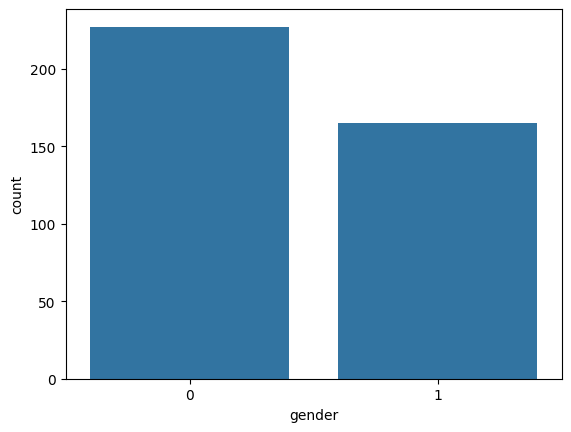

In [362]:
sns.countplot(x= X_train.gender)

<Axes: xlabel='age', ylabel='Count'>

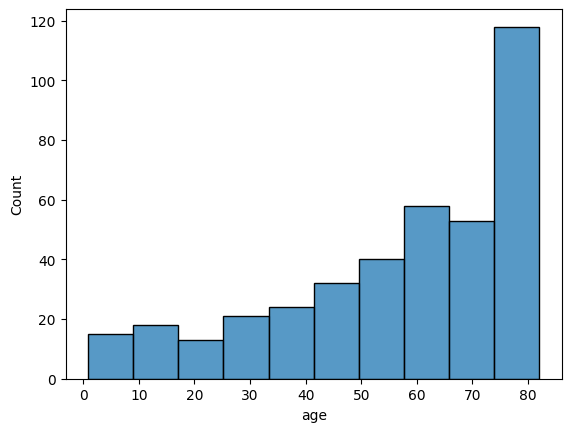

In [363]:
sns.histplot(x= X_train.age, bins = 10)

<Axes: xlabel='hypertension', ylabel='count'>

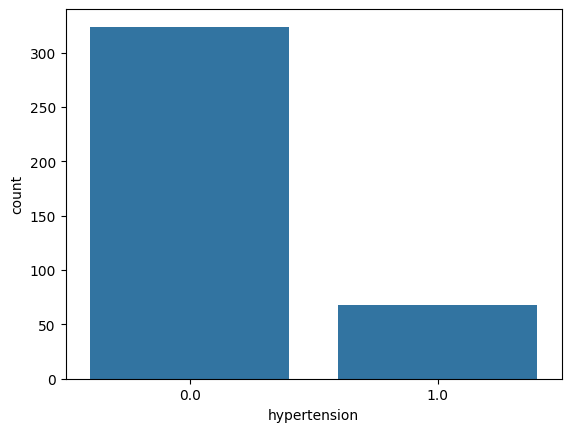

In [364]:
sns.countplot(x=X_train.hypertension)

<Axes: xlabel='heart_disease', ylabel='count'>

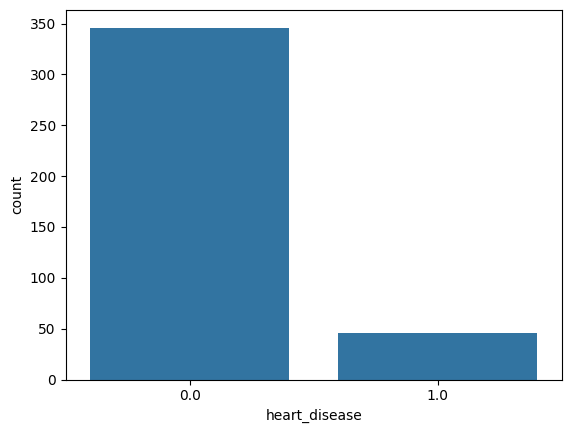

In [365]:
sns.countplot(x=X_train.heart_disease)

<Axes: xlabel='ever_married', ylabel='count'>

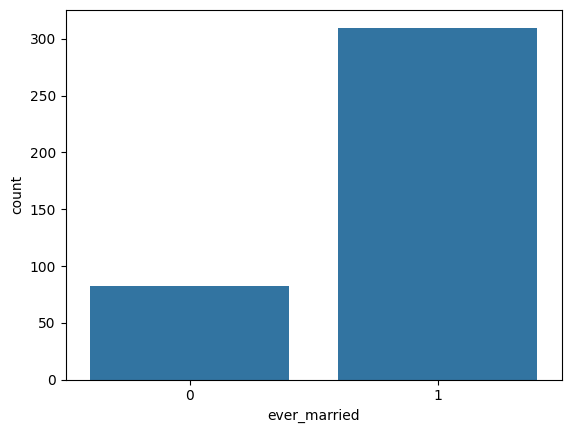

In [366]:
sns.countplot(x=X_train.ever_married)


<Axes: xlabel='Residence_type', ylabel='count'>

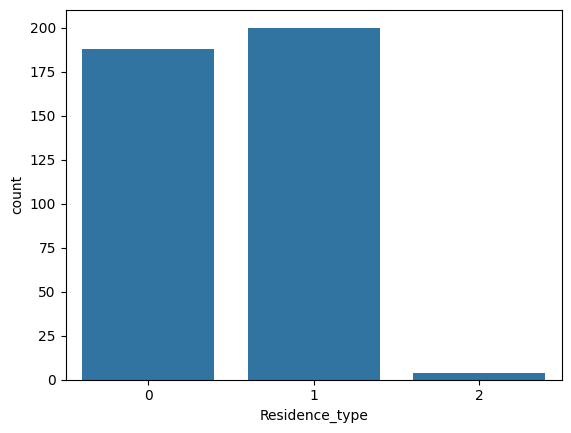

In [367]:
sns.countplot(x=X_train.Residence_type)


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

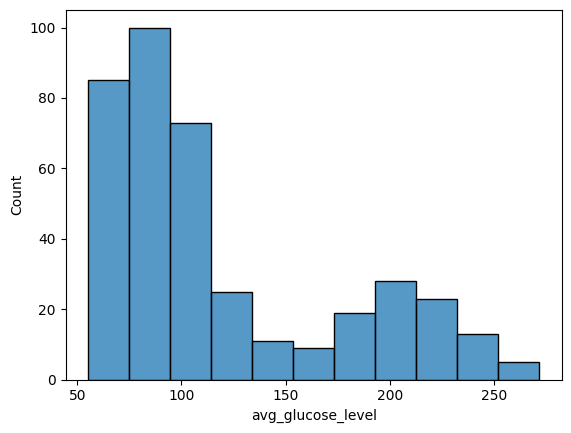

In [368]:
sns.histplot(x= X_train.avg_glucose_level)

<Axes: xlabel='bmi', ylabel='Count'>

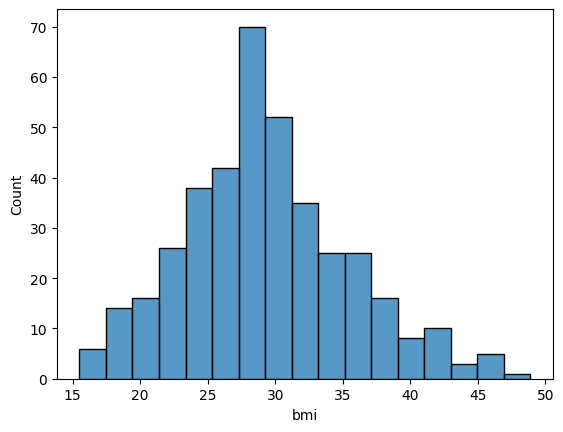

In [369]:
sns.histplot(x= X_train.bmi)


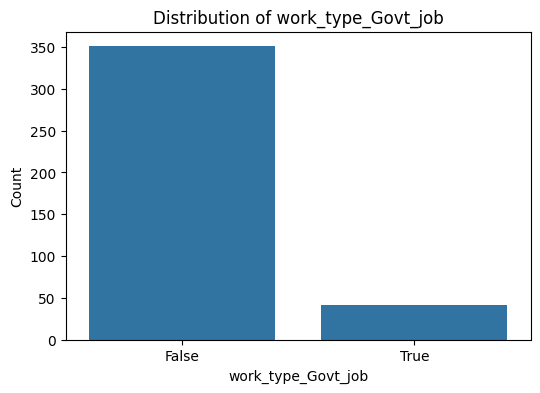

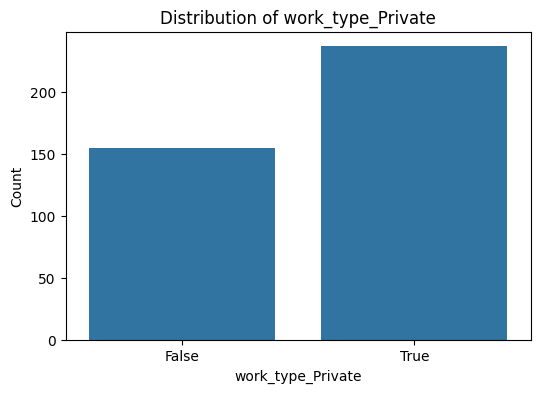

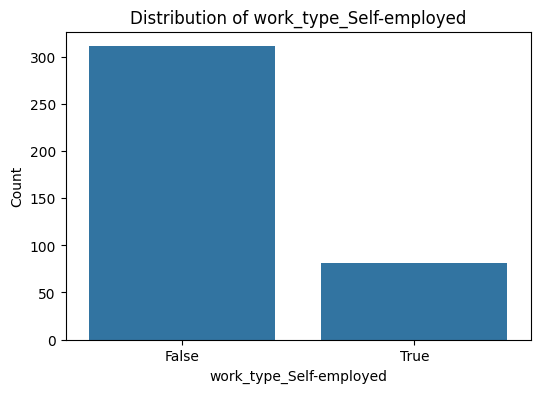

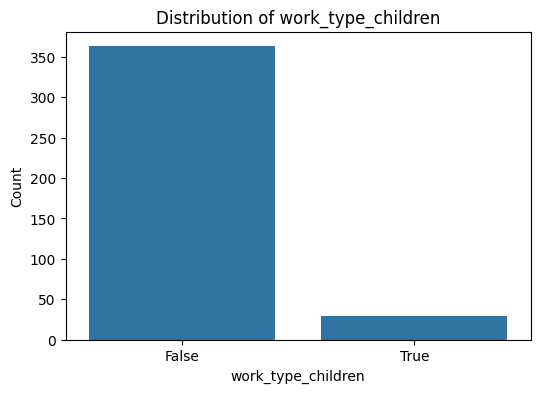

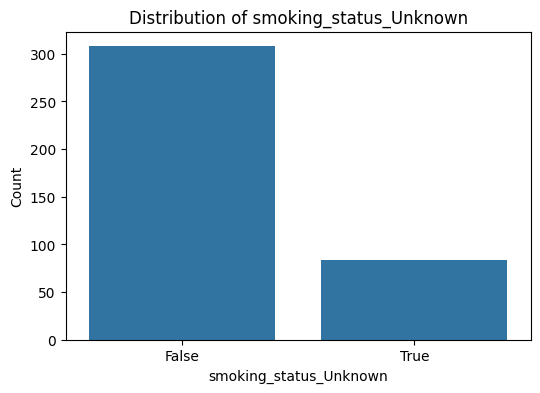

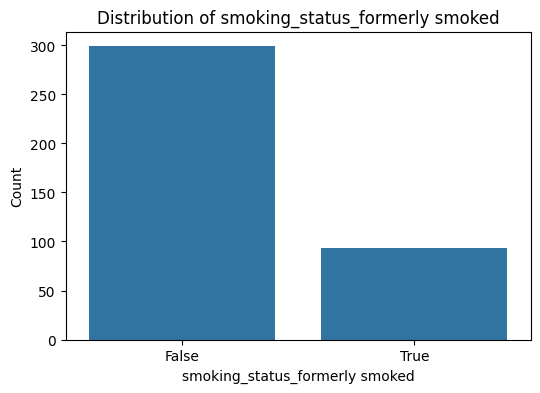

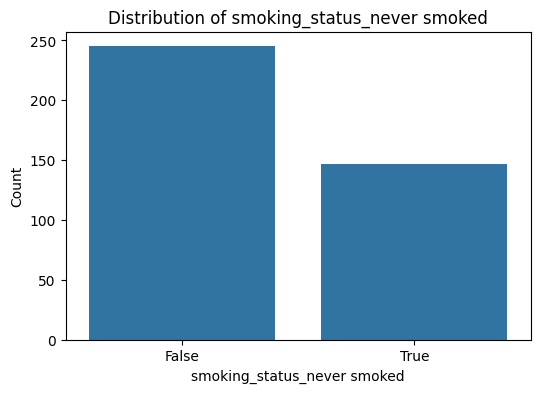

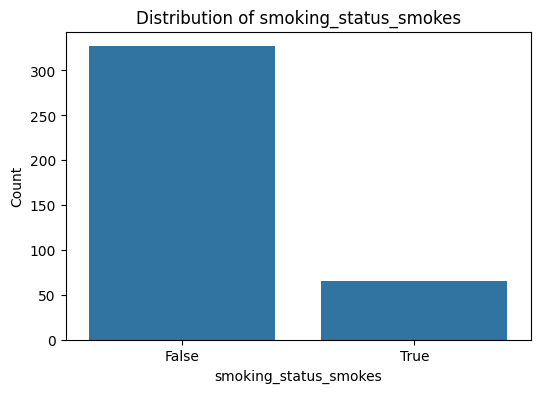

In [370]:
for col in cat_columns.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=X_train[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.show()

In [371]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

## Multivariate Analysis

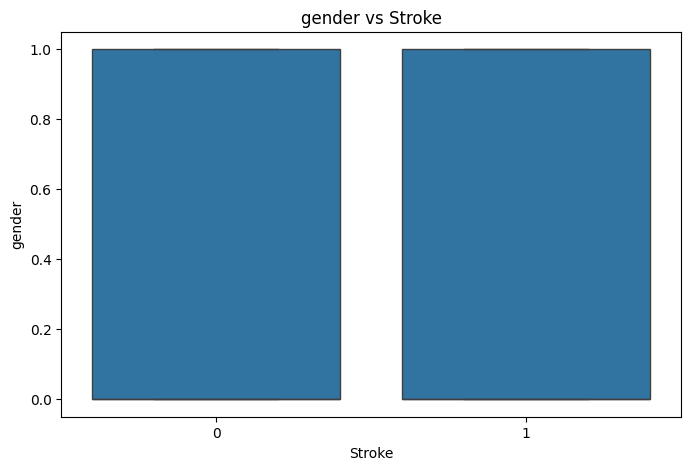

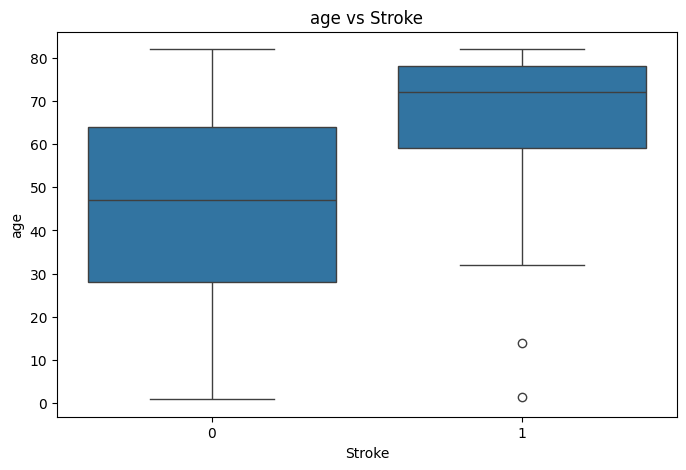

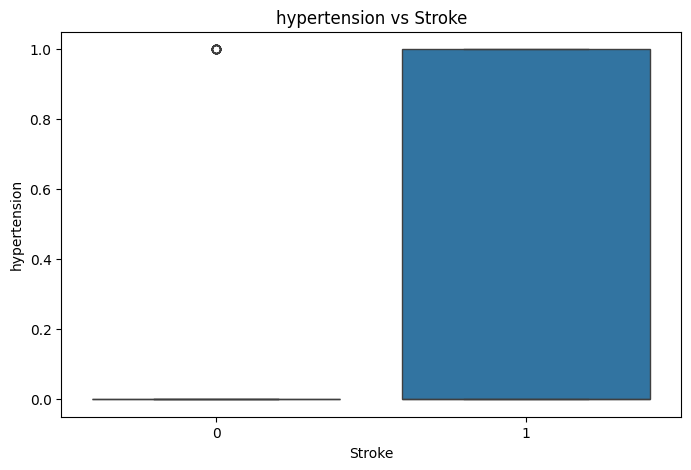

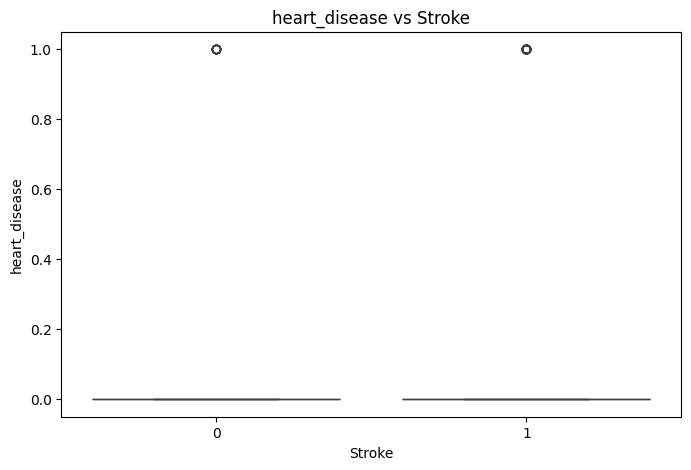

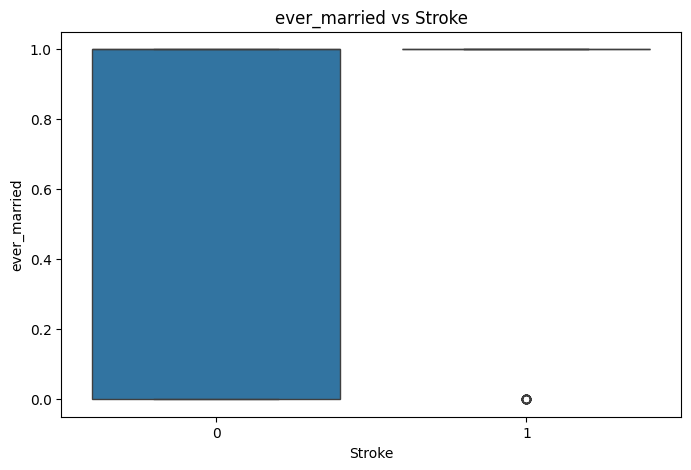

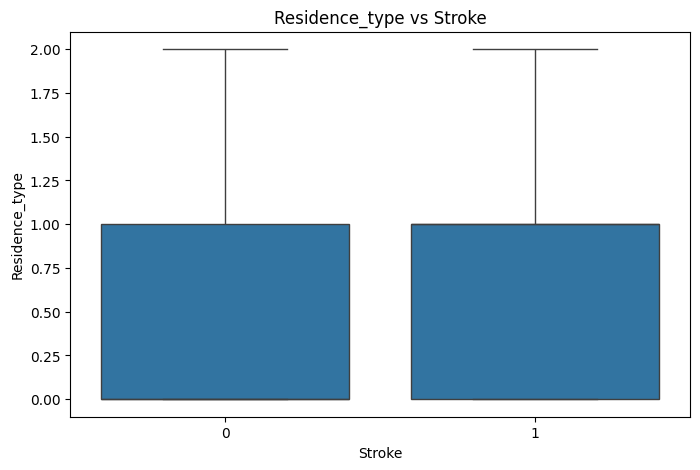

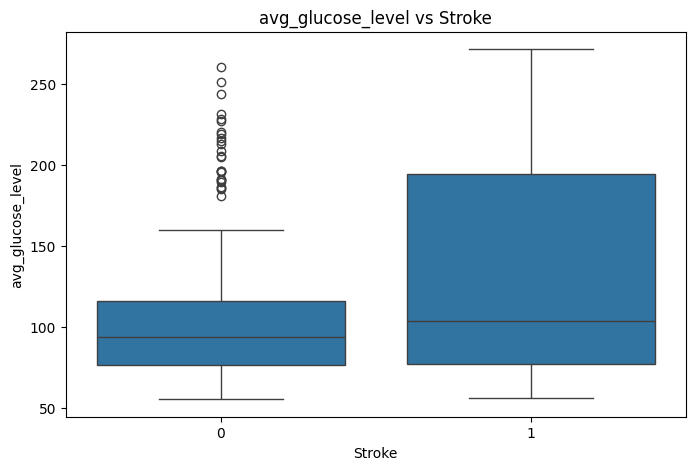

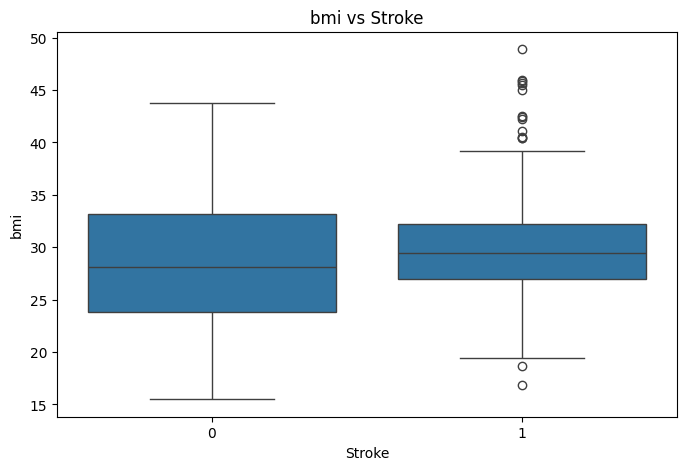

In [372]:
for col in num_columns.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=y_train, y=num_columns[col])
    plt.xlabel('Stroke')
    plt.ylabel(col)
    plt.title(f'{col} vs Stroke')
    plt.show()

In [373]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
4513,1,66.0,0.0,0.0,1,0,67.92,31.1,False,True,False,False,False,True,False,False,0
3844,0,78.0,0.0,0.0,1,0,208.99,31.4,False,False,True,False,False,True,False,False,0
4732,0,61.0,0.0,0.0,1,0,120.23,22.7,True,False,False,False,True,False,False,False,0
3423,1,78.0,0.0,1.0,1,1,101.53,24.1,False,False,True,False,False,True,False,False,0
1403,1,56.0,0.0,0.0,1,0,97.50,36.3,False,True,False,False,False,True,False,False,0


<Axes: >

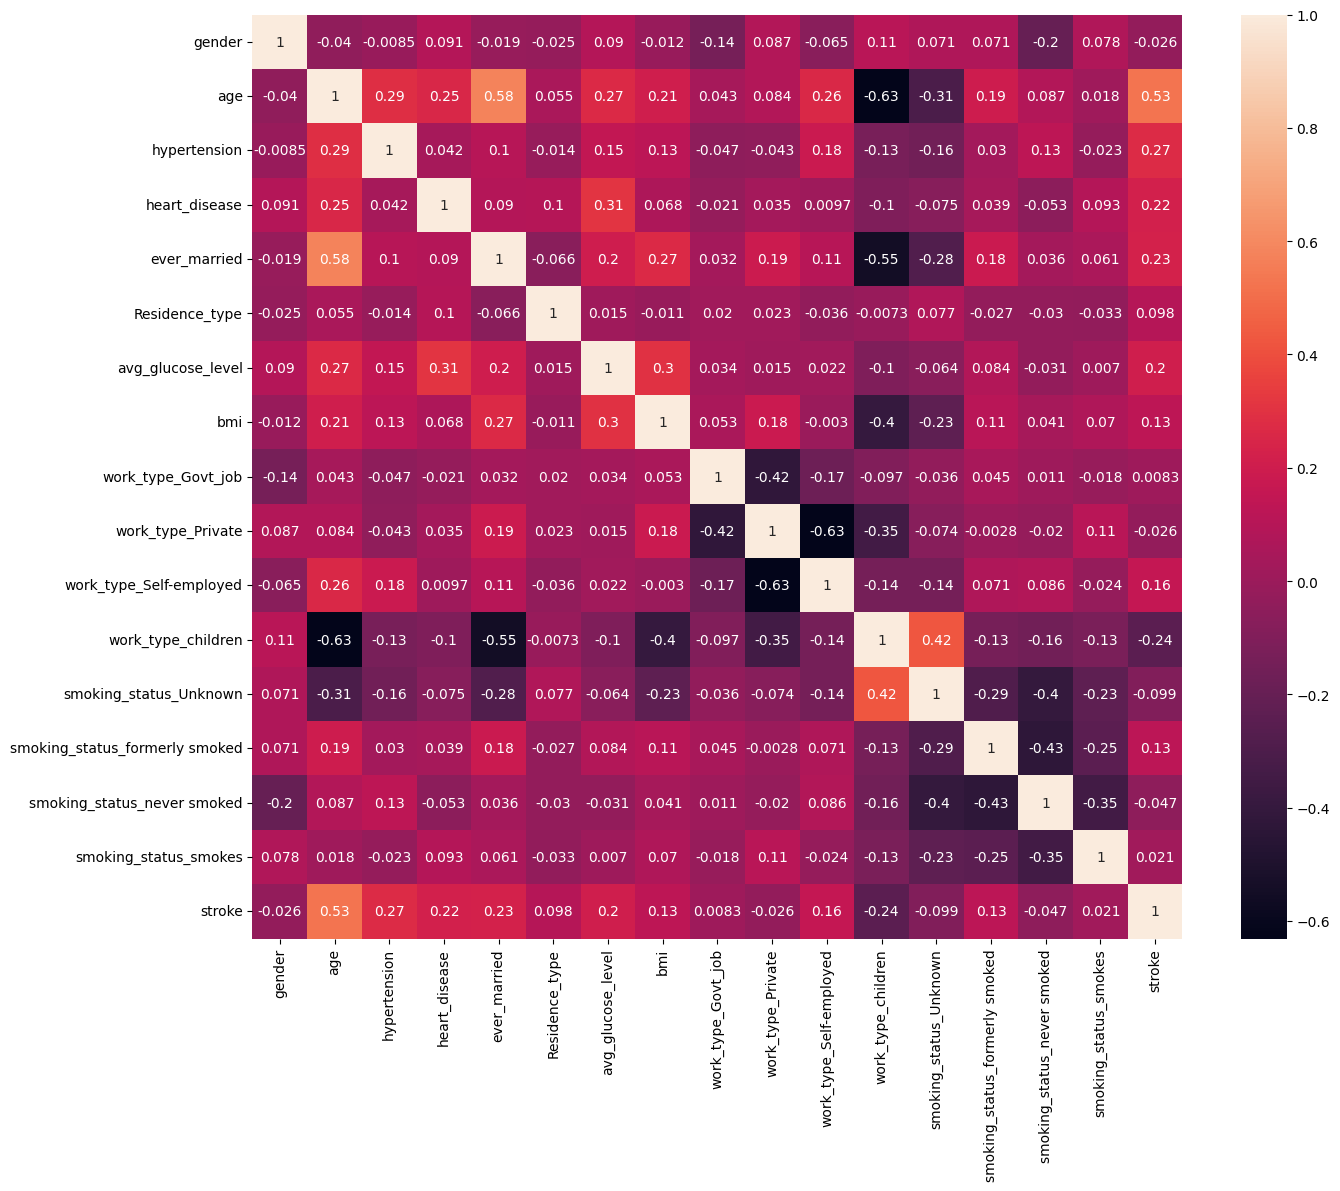

In [374]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_train.corr(), annot=True) 

In [375]:
X_train = X_train[ ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level','bmi', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked']]
y_train = y_train

In [376]:
X_train.shape

(392, 9)

In [377]:
y_train.shape

(392,)

In [378]:
# Checking the null values in X_train 
X_train.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 1
bmi                               0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
dtype: int64

In [431]:

# Checking the null values of X_test
X_test.isnull().sum()


gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
work_type_Govt_job                0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [ ]:
## Lets do for null values of X_test
X_test.gender.unique()

In [383]:
X_test['gender'] = X_test['gender'].fillna(X_test['gender'].mode()[0])
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3331,Female,50.0,0.0,0.0,Yes,Self-employed,Urban,69.92,18.7,formerly smoked
1095,Male,73.0,1.0,1.0,Yes,Self-employed,Rural,230.68,37.7,Unknown
53,Female,70.0,0.0,0.0,Yes,Private,Urban,221.58,47.5,never smoked
814,Male,81.0,1.0,0.0,Yes,Self-employed,Urban,231.19,31.6,formerly smoked
4552,Female,50.0,0.0,1.0,Yes,Private,Urban,193.80,26.4,never smoked
...,...,...,...,...,...,...,...,...,...,...
293,Female,49.0,0.0,0.0,Yes,Private,Rural,138.16,19.4,never smoked
344,Male,38.0,0.0,0.0,No,Self-employed,Urban,74.09,39.6,never smoked
4397,Female,61.0,0.0,0.0,Yes,Private,Rural,106.65,35.9,formerly smoked
1339,Female,22.0,0.0,0.0,No,Private,Rural,62.81,21.3,never smoked


In [384]:
X_test.gender.unique()

array(['Female', 'Male'], dtype=object)

In [385]:
X_test.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        2
ever_married         2
work_type            3
Residence_type       3
avg_glucose_level    2
bmi                  0
smoking_status       0
dtype: int64

In [389]:
## Lets do for null values of X_test
X_test.heart_disease.unique()

array([ 0.,  1., nan])

In [390]:
# Checking the percetange data in each category
X_test['heart_disease'].value_counts(dropna=False, normalize=True)

heart_disease
0.0    0.946841
1.0    0.051153
NaN    0.002006
Name: proportion, dtype: float64

In [391]:
X_test['heart_disease'] = X_test['heart_disease'].fillna(X_test['heart_disease'].mode()[0])
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3331,Female,50.0,0.0,0.0,Yes,Self-employed,Urban,69.92,18.7,formerly smoked
1095,Male,73.0,1.0,1.0,Yes,Self-employed,Rural,230.68,37.7,Unknown
53,Female,70.0,0.0,0.0,Yes,Private,Urban,221.58,47.5,never smoked
814,Male,81.0,1.0,0.0,Yes,Self-employed,Urban,231.19,31.6,formerly smoked
4552,Female,50.0,0.0,1.0,Yes,Private,Urban,193.80,26.4,never smoked


In [392]:
X_test.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         2
work_type            3
Residence_type       3
avg_glucose_level    2
bmi                  0
smoking_status       0
dtype: int64

In [393]:
## Lets do for null values of X_test
X_test.ever_married.unique()

array(['Yes', 'No', nan], dtype=object)

In [394]:
# Checking the percetange data in each category
X_test['ever_married'].value_counts(dropna=False, normalize=True)

ever_married
Yes    0.646941
No     0.351053
NaN    0.002006
Name: proportion, dtype: float64

In [395]:
X_test['ever_married'] = X_test['ever_married'].fillna(X_test['ever_married'].mode()[0])
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3331,Female,50.0,0.0,0.0,Yes,Self-employed,Urban,69.92,18.7,formerly smoked
1095,Male,73.0,1.0,1.0,Yes,Self-employed,Rural,230.68,37.7,Unknown
53,Female,70.0,0.0,0.0,Yes,Private,Urban,221.58,47.5,never smoked
814,Male,81.0,1.0,0.0,Yes,Self-employed,Urban,231.19,31.6,formerly smoked
4552,Female,50.0,0.0,1.0,Yes,Private,Urban,193.80,26.4,never smoked


In [396]:
X_test.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            3
Residence_type       3
avg_glucose_level    2
bmi                  0
smoking_status       0
dtype: int64

In [397]:
## Lets do for null values of X_test
X_test.work_type.unique()

array(['Self-employed', 'Private', 'children', 'Govt_job', nan],
      dtype=object)

In [399]:
# Checking the percetange data in each category
X_test['work_type'].value_counts(dropna=False, normalize=True)

work_type
Private          0.556670
Self-employed    0.155466
Govt_job         0.146439
children         0.138415
NaN              0.003009
Name: proportion, dtype: float64

In [400]:
X_test['work_type'] = X_test['work_type'].fillna(X_test['work_type'].mode()[0])
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3331,Female,50.0,0.0,0.0,Yes,Self-employed,Urban,69.92,18.7,formerly smoked
1095,Male,73.0,1.0,1.0,Yes,Self-employed,Rural,230.68,37.7,Unknown
53,Female,70.0,0.0,0.0,Yes,Private,Urban,221.58,47.5,never smoked
814,Male,81.0,1.0,0.0,Yes,Self-employed,Urban,231.19,31.6,formerly smoked
4552,Female,50.0,0.0,1.0,Yes,Private,Urban,193.80,26.4,never smoked


In [402]:
X_test.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       3
avg_glucose_level    2
bmi                  0
smoking_status       0
dtype: int64

In [403]:
X_test.Residence_type.unique()

array(['Urban', 'Rural', nan], dtype=object)

In [404]:
# Checking the percetange data in each category
X_test['Residence_type'].value_counts(dropna=False, normalize=True)

Residence_type
Urban    0.501505
Rural    0.495486
NaN      0.003009
Name: proportion, dtype: float64

In [405]:
X_test['Residence_type'] = X_test['Residence_type'].fillna(X_test['Residence_type'].mode()[0])
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3331,Female,50.0,0.0,0.0,Yes,Self-employed,Urban,69.92,18.7,formerly smoked
1095,Male,73.0,1.0,1.0,Yes,Self-employed,Rural,230.68,37.7,Unknown
53,Female,70.0,0.0,0.0,Yes,Private,Urban,221.58,47.5,never smoked
814,Male,81.0,1.0,0.0,Yes,Self-employed,Urban,231.19,31.6,formerly smoked
4552,Female,50.0,0.0,1.0,Yes,Private,Urban,193.80,26.4,never smoked


In [406]:
X_test.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    2
bmi                  0
smoking_status       0
dtype: int64

In [410]:
# Checking the percetange data in each category
X_test['avg_glucose_level'].value_counts(dropna=False, normalize=True)

avg_glucose_level
88.83     0.003009
60.70     0.002006
79.60     0.002006
68.35     0.002006
107.18    0.002006
            ...   
138.16    0.001003
74.09     0.001003
106.65    0.001003
62.81     0.001003
94.76     0.001003
Name: proportion, Length: 946, dtype: float64

In [411]:
X_test['avg_glucose_level'] = X_test['avg_glucose_level'].fillna(X_test['avg_glucose_level'].mode()[0])
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3331,Female,50.0,0.0,0.0,Yes,Self-employed,Urban,69.92,18.7,formerly smoked
1095,Male,73.0,1.0,1.0,Yes,Self-employed,Rural,230.68,37.7,Unknown
53,Female,70.0,0.0,0.0,Yes,Private,Urban,221.58,47.5,never smoked
814,Male,81.0,1.0,0.0,Yes,Self-employed,Urban,231.19,31.6,formerly smoked
4552,Female,50.0,0.0,1.0,Yes,Private,Urban,193.80,26.4,never smoked


In [412]:
X_test.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [413]:
X_train.age.head

<bound method NDFrame.head of 4513    66.0
3844    78.0
4732    61.0
3423    78.0
1403    56.0
        ... 
68      54.0
163     80.0
97      74.0
174     63.0
122     78.0
Name: age, Length: 392, dtype: float64>

<Axes: xlabel='age', ylabel='Count'>

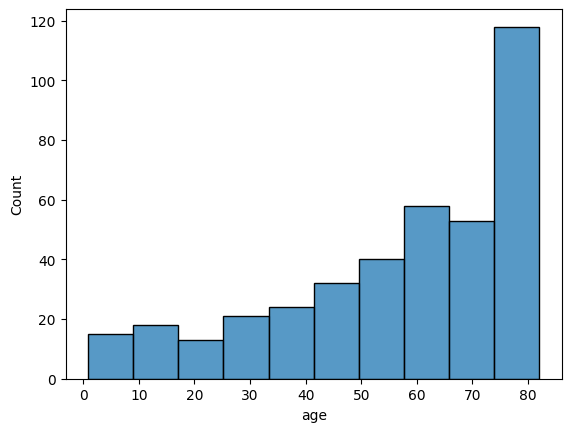

In [416]:
sns.histplot(x = X_train.age, bins = 10)

In [420]:
from sklearn.preprocessing import MinMaxScaler

age_scaler = MinMaxScaler()
X_train['age'] = age_scaler.fit_transform(X_train[['age']])
X_test['age'] = age_scaler.transform(X_test[['age']])
X_train.head()


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Self-employed,work_type_children,smoking_status_formerly smoked
4513,0.802761,0.0,0.0,1,67.92,31.1,False,False,True
3844,0.950690,0.0,0.0,1,208.99,31.4,True,False,True
4732,0.741124,0.0,0.0,1,120.23,22.7,False,False,False
3423,0.950690,0.0,1.0,1,101.53,24.1,True,False,True
1403,0.679487,0.0,0.0,1,97.50,36.3,False,False,True


In [421]:
from sklearn.preprocessing import MinMaxScaler

glucose_scaler = MinMaxScaler()
X_train['avg_glucose_level'] = glucose_scaler.fit_transform(X_train[['avg_glucose_level']])
X_test['avg_glucose_level'] = glucose_scaler.transform(X_test[['avg_glucose_level']])


In [425]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3331,Female,50.0,0.0,0.0,Yes,Self-employed,Urban,0.067720,18.7,formerly smoked
1095,Male,73.0,1.0,1.0,Yes,Self-employed,Rural,0.810329,37.7,Unknown
53,Female,70.0,0.0,0.0,Yes,Private,Urban,0.768293,47.5,never smoked
814,Male,81.0,1.0,0.0,Yes,Self-employed,Urban,0.812685,31.6,formerly smoked
4552,Female,50.0,0.0,1.0,Yes,Private,Urban,0.639967,26.4,never smoked


In [426]:
X_test.work_type.unique()

array(['Self-employed', 'Private', 'children', 'Govt_job'], dtype=object)

In [427]:
X_test.Residence_type.unique()


array(['Urban', 'Rural'], dtype=object)

In [428]:
X_test.smoking_status.unique()


array(['formerly smoked', 'Unknown', 'never smoked', 'smokes'],
      dtype=object)

In [429]:
X_test = pd.get_dummies(X_test, columns=['work_type', 'smoking_status'])

### LabelEncoding

In [430]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3331,Female,50.0,0.0,0.0,Yes,Urban,0.067720,18.7,False,False,True,False,False,True,False,False
1095,Male,73.0,1.0,1.0,Yes,Rural,0.810329,37.7,False,False,True,False,True,False,False,False
53,Female,70.0,0.0,0.0,Yes,Urban,0.768293,47.5,False,True,False,False,False,False,True,False
814,Male,81.0,1.0,0.0,Yes,Urban,0.812685,31.6,False,False,True,False,False,True,False,False
4552,Female,50.0,0.0,1.0,Yes,Urban,0.639967,26.4,False,True,False,False,False,False,True,False


## Modeling